# Content

# Introduction 

**What are ETFs?**

ETFs are investment funds that are traded on the stock exchange, similar to company stocks. Unlike a stock that represents ownership in a specific company, an ETF reflects a basket of assets, which can include stocks, bonds, and commodities, among others.


In the ever-evolving world of finance, data analytics and machine learning have become indispensable tools for informed decision-making. In the pursuit of optimising investment strategies, this project embarks on a journey to harness the power of data to predict the profitability of Exchange-Traded Funds (ETSs).


The financial markets are complex ecosystems, where numerous factors influence the performance of assets. As a popular investment vehicle, ETFs offer exposure to diversified portfolios of assets, making them an attractive option for investors seeking a broad spectrum of market opportunities. However, the profitability of these ETFs is inherently tied to the individual stocks that constitute them.


Our exploration centres on the opening and closing prices of stocks, as well as other relevant data within our dataset. External influences, such as geopolitical or environmental factors, are intentionally excluded to focus solely on the internal dynamics of these financial assets.


This endeavour embodies the essence of data analytics leveraging the CRISP-DM methodology to systematically progress through the project phases, from understanding the business objectives to data preparation, modelling evaluation, and deployment. As we delve into this project, we recognize the critical importance of clear documentation, thorough evaluation, and continuous improvement to ensure that the results generated are not only insightful but also dependable.

All data used in this project is for public use and can be found at the following links:

* https://www.ishares.com/us/products/etf-investments#/?productView=etf&pageNumber=1&sortColumn=totalNetAssets&sortDirection=desc&dataView=keyFacts

* https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

<font color='red'>Note : This project focuses on the analysis and evaluation of Machine Learning and Data Analytics tools to determine the optimal models in predicting the profitability of stocks.The project does not aim to provide incentives or advice on stock investments. Any investment, including ETFs, comes with risks. Before investing in an ETF, it's crucial to fully research and understand its characteristics and risks. It's highly recommended to consult with a financial advisor or investment expert when exploring investment options. </font> 

# Business Understanding

The project involves a rigorous process of selecting and applying diverse machine-learning algorithms to historical stock market data. In the initial phase of the project, we seek a comprehensive understanding of the business objectives.

To accomplish this, the project may involve tasks such as data preprocessing, feature selection, model training, and model evaluation. The performance of various models will be compared, and the one that exhibits the highest predictive accuracy and reliability in determining stock profitability will be identified as the optimal

# Data Understanding

Perform an initial assessment of the data to understand its structure, format, and general characteristics, verifying the data sources, data types, and the size of the dataset. Furthermore, examine summary statistics, including measures of central tendency and dispersion, to identify any unusual or extreme values where we visualize the data using charts or graphs to identify trends, patterns and potential inconsistencies

In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_ETF = pd.read_excel('iShares_UnitedStates_Modified.xls')

In [3]:
df_ETF.head()

Ticker                                    Name SEDOL          ISIN  \
0    IVV                iShares Core S&P 500 ETF     -  US4642872000   
1   IEFA              iShares Core MSCI EAFE ETF     -  US46432F8427   
2    AGG    iShares Core U.S. Aggregate Bond ETF     -  US4642872265   
3    IWF         iShares Russell 1000 Growth ETF     -  US4642876142   
4   IEMG  iShares Core MSCI Emerging Markets ETF     -  US46434G1031   

       CUSIP Incept. Date  Gross Expense Ratio (%)  Net Expense Ratio (%)  \
0  464287200   2000-05-15                     0.03                   0.03   
1  46432F842   2012-10-18                     0.07                   0.07   
2  464287226   2003-09-22                     0.03                   0.03   
3  464287614   2000-05-22                     0.19                   0.19   
4  46434G103   2012-10-18                     0.09                   0.09   

   Net Assets (USD) Net Assets as of  ...  \
0      3.421875e+11       2023-10-20  ...   
1      9.263588e+10       2023-10-20  ...   
2      8.885685e+10       2023-10-20  ...   
3      6.885560e+10       2023-10-20  ...   
4      6.719045e+10       2023-10-20  ...   

  Fixed Income Characteristics - Option Adjusted Spread  \
0                                            0.00682      
1                                            0.00013      
2                                           56.15833      
3                                            0.00214      
4                                            0.00226      

  Fixed Income Characteristics - Avg. Yield (%)  \
0                                             -   
1                                             -   
2                                          5.74   
3                                             -   
4                                             -   

  Fixed Income Characteristics - Avg. Yield as of Date  \
0                                                  -     
1                                                  -     
2                                2023-10-19 00:00:00     
3                                                  -     
4                                                  -     

  Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Fund Rating (AAA-CCC)  \
0                                                  A                                        
1                                                 AA                                        
2                                                  A                                        
3                                                  A                                        
4                                                BBB                                        

  Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Quality Score (0-10)  \
0                                             6.6003                                       
1                                             7.5536                                       
2                                             6.0752                                       
3                                             6.6448                                       
4                                             5.3425                                       

  Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI Weighted Average Carbon Intensity (Tons CO2E/$M SALES)  \
0                                             113.33                                                                     
1                                             106.96                                                                     
2                                             271.14                                                                     
3                                              30.75                                                                     
4                                              337.9                                                  

In [4]:
# Columns of interest
columns_selected = [
    "Ticker", 
    "Name", 
    "Gross Expense Ratio (%)", 
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

# New DataFrame
df_selected = df_ETF[columns_selected]
df_selected.head(-5)

Ticker                                     Name  Gross Expense Ratio (%)  \
0      IVV                 iShares Core S&P 500 ETF                     0.03   
1     IEFA               iShares Core MSCI EAFE ETF                     0.07   
2      AGG     iShares Core U.S. Aggregate Bond ETF                     0.03   
3      IWF          iShares Russell 1000 Growth ETF                     0.19   
4     IEMG   iShares Core MSCI Emerging Markets ETF                     0.09   
..     ...                                      ...                      ...   
421   ITDC  iShares® LifePath® Target Date 2035 ETF                     0.10   
422   ITDD  iShares® LifePath® Target Date 2040 ETF                     0.11   
423   IBIJ  iShares® iBonds® Oct 2033 Term TIPS ETF                     0.10   
424   ITDE  iShares® LifePath® Target Date 2045 ETF                     0.11   
425   ITDF  iShares® LifePath® Target Date 2050 ETF                     0.11   

    Avg. Annual Return: Price Monthly - 1Y (%)  \
0                                    21.691873   
1                                         25.2   
2                                         0.54   
3                                    27.457088   
4                                        13.37   
..                                         ...   
421                                          -   
422                                          -   
423                                          -   
424                                          -   
425                                          -   

    Avg. Annual Return: Price Monthly - 3Y (%)  \
0                                    10.174129   
1                                         5.23   
2                                        -5.21   
3                                     7.796373   
4                                        -0.89   
..                                         ...   
421                                          -   
422                                          -   
423                                          -   
424                                          -   
425                                          -   

    Avg. Annual Return: Price Monthly - 5Y (%)  \
0                                     9.896895   
1                                         3.05   
2                                         0.08   
3                                    12.204825   
4                                         1.06   
..                                         ...   
421                                          -   
422                                          -   
423                                          -   
424                                          -   
425                                          -   

    Avg. Annual Return: Price Monthly - 10Y (%)  
0                                     11.873788  
1                                             4  
2                                          1.09  
3                                      14.26745  
4                                          2.29  
..                                          ...  
421                                           -  
422                                           -  
423                                           -  
424                                           -  
425                                           -  

[426 rows x 7 columns]

In [5]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Ticker                                       431 non-null    object 
 1   Name                                         431 non-null    object 
 2   Gross Expense Ratio (%)                      431 non-null    float64
 3   Avg. Annual Return: Price Monthly - 1Y (%)   431 non-null    object 
 4   Avg. Annual Return: Price Monthly - 3Y (%)   431 non-null    object 
 5   Avg. Annual Return: Price Monthly - 5Y (%)   431 non-null    object 
 6   Avg. Annual Return: Price Monthly - 10Y (%)  431 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.7+ KB


In [6]:
df_selected.describe()

Gross Expense Ratio (%)
count               431.000000
mean                  0.324594
std                   0.223217
min                   0.030000
25%                   0.150000
50%                   0.300000
75%                   0.470000
max                   1.470000

In [7]:
null_counts = df_selected.isnull().sum()
null_counts

Ticker                                         0
Name                                           0
Gross Expense Ratio (%)                        0
Avg. Annual Return: Price Monthly - 1Y (%)     0
Avg. Annual Return: Price Monthly - 3Y (%)     0
Avg. Annual Return: Price Monthly - 5Y (%)     0
Avg. Annual Return: Price Monthly - 10Y (%)    0
dtype: int64

Before moving forward, it's important to note that, when inspecting the DataFrame using the df_selected.head(-5) code, we identified the presence of "-" values. These values can be interpreted as "0" or alternatively, as "NaN".

Although we expect these columns to contain only numeric values, we haven't yet confirmed if there are other distinct values apart from "-".

Given this scenario, the code null_counts = df_selected.isnull().sum() wouldn't provide us with an accurate detection of null values, since "-" is not recognized as a null value by default in Pandas.

To address this situation, we will proceed with the following code, the detailed explanation of which will be provided subsequently:

Function definition of is_number(s):

This function aims to verify if a value (represented by the variable "s") is numeric.
Inside the function, it tries to convert "s" into a floating-point number using float(s).
If the conversion is successful, it means that "s" is numeric, and the function returns True.
If the conversion throws a ValueError, it means that "s" is not numeric, and the function returns False.

Function definition of non_numeric_counts(series):

This function aims to count the non-numeric values in a Pandas series.
It uses a list comprehension to iterate over each item in the series. For every item that is not null (pd.isnull(item)) or is not numeric (is_number(item)), it adds 1 to the count.
The function returns the total number of non-numeric values in the series.

Function application:

The line non_numeric_counts = df_selected.apply(non_numeric_counts) applies the non_numeric_counts function to each column of the DataFrame df_selected. As a result, we get a series where the index is the column name, and the value is the count of non-numeric entries in that column.

The code provides a robust method to count non-numeric values in each column of our DataFrame. Essentially, it tries to convert each value into a number, and if the conversion fails, it considers it as a non-numeric value.

In [8]:
# Non-Numeric
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def non_numeric_counts(series):
    return sum(1 for item in series if not (pd.isnull(item) or is_number(item)))

non_numeric_counts = df_selected.apply(non_numeric_counts)

non_numeric_counts

Ticker                                         431
Name                                           431
Gross Expense Ratio (%)                          0
Avg. Annual Return: Price Monthly - 1Y (%)      43
Avg. Annual Return: Price Monthly - 3Y (%)      80
Avg. Annual Return: Price Monthly - 5Y (%)     128
Avg. Annual Return: Price Monthly - 10Y (%)    205
dtype: int64

After executing our code, we've identified the presence of non-numeric values within our columns. These will be replaced by "NaN".

Why do we choose "NaN" over "0"?

The decision to replace non-numeric values with "NaN" stems from the numeric nature of the columns. Should we opt for "0", it might introduce distortions into our analysis, creating outlier values that don't faithfully represent our data.

In [9]:
# Replace "-" values with "NaN"
df_selected = df_selected.replace("-", float('NaN'))

df_selected.head(-5)

Ticker                                     Name  Gross Expense Ratio (%)  \
0      IVV                 iShares Core S&P 500 ETF                     0.03   
1     IEFA               iShares Core MSCI EAFE ETF                     0.07   
2      AGG     iShares Core U.S. Aggregate Bond ETF                     0.03   
3      IWF          iShares Russell 1000 Growth ETF                     0.19   
4     IEMG   iShares Core MSCI Emerging Markets ETF                     0.09   
..     ...                                      ...                      ...   
421   ITDC  iShares® LifePath® Target Date 2035 ETF                     0.10   
422   ITDD  iShares® LifePath® Target Date 2040 ETF                     0.11   
423   IBIJ  iShares® iBonds® Oct 2033 Term TIPS ETF                     0.10   
424   ITDE  iShares® LifePath® Target Date 2045 ETF                     0.11   
425   ITDF  iShares® LifePath® Target Date 2050 ETF                     0.11   

     Avg. Annual Return: Price Monthly - 1Y (%)  \
0                                     21.691873   
1                                     25.200000   
2                                      0.540000   
3                                     27.457088   
4                                     13.370000   
..                                          ...   
421                                         NaN   
422                                         NaN   
423                                         NaN   
424                                         NaN   
425                                         NaN   

     Avg. Annual Return: Price Monthly - 3Y (%)  \
0                                     10.174129   
1                                      5.230000   
2                                     -5.210000   
3                                      7.796373   
4                                     -0.890000   
..                                          ...   
421                                         NaN   
422                                         NaN   
423                                         NaN   
424                                         NaN   
425                                         NaN   

     Avg. Annual Return: Price Monthly - 5Y (%)  \
0                                      9.896895   
1                                      3.050000   
2                                      0.080000   
3                                     12.204825   
4                                      1.060000   
..                                          ...   
421                                         NaN   
422                                         NaN   
423                                         NaN   
424                                         NaN   
425                                         NaN   

     Avg. Annual Return: Price Monthly - 10Y (%)  
0                                      11.873788  
1                                       4.000000  
2                                       1.090000  
3                                      14.267450  
4                                       2.290000  
..                                           ...  
421                                          NaN  
422                                          NaN  
423                                          NaN  
424                                          NaN  
425                                          NaN  

[426 rows x 7 columns]

After running the code again, we can confirm that there are no longer any non-numeric values. These have been replaced, leaving non-numeric values only in the columns where they are appropriate.

In [10]:
# Non-Numeric
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def non_numeric_counts(series):
    return sum(1 for item in series if not (pd.isnull(item) or is_number(item)))

non_numeric_counts = df_selected.apply(non_numeric_counts)

non_numeric_counts

Ticker                                         431
Name                                           431
Gross Expense Ratio (%)                          0
Avg. Annual Return: Price Monthly - 1Y (%)       0
Avg. Annual Return: Price Monthly - 3Y (%)       0
Avg. Annual Return: Price Monthly - 5Y (%)       0
Avg. Annual Return: Price Monthly - 10Y (%)      0
dtype: int64

In [11]:
df_selected.describe()

Gross Expense Ratio (%)  Avg. Annual Return: Price Monthly - 1Y (%)  \
count               431.000000                                  388.000000   
mean                  0.324594                                   12.786422   
std                   0.223217                                   13.007914   
min                   0.030000                                  -49.260000   
25%                   0.150000                                    4.217500   
50%                   0.300000                                   11.211000   
75%                   0.470000                                   20.377964   
max                   1.470000                                   81.820000   

       Avg. Annual Return: Price Monthly - 3Y (%)  \
count                                  351.000000   
mean                                     4.324097   
std                                      9.462284   
min                                    -23.070000   
25%                                     -1.460000   
50%                                      3.400000   
75%                                      9.345755   
max                                     59.538662   

       Avg. Annual Return: Price Monthly - 5Y (%)  \
count                                  303.000000   
mean                                     3.651605   
std                                      4.402681   
min                                     -7.150000   
25%                                      0.845000   
50%                                      2.992600   
75%                                      6.480000   
max                                     21.998164   

       Avg. Annual Return: Price Monthly - 10Y (%)  
count                                   226.000000  
mean                                      5.036953  
std                                       4.817551  
min                                      -7.548510  
25%                                       1.500000  
50%                                       4.005000  
75%                                       8.422788  
max                                      23.140869

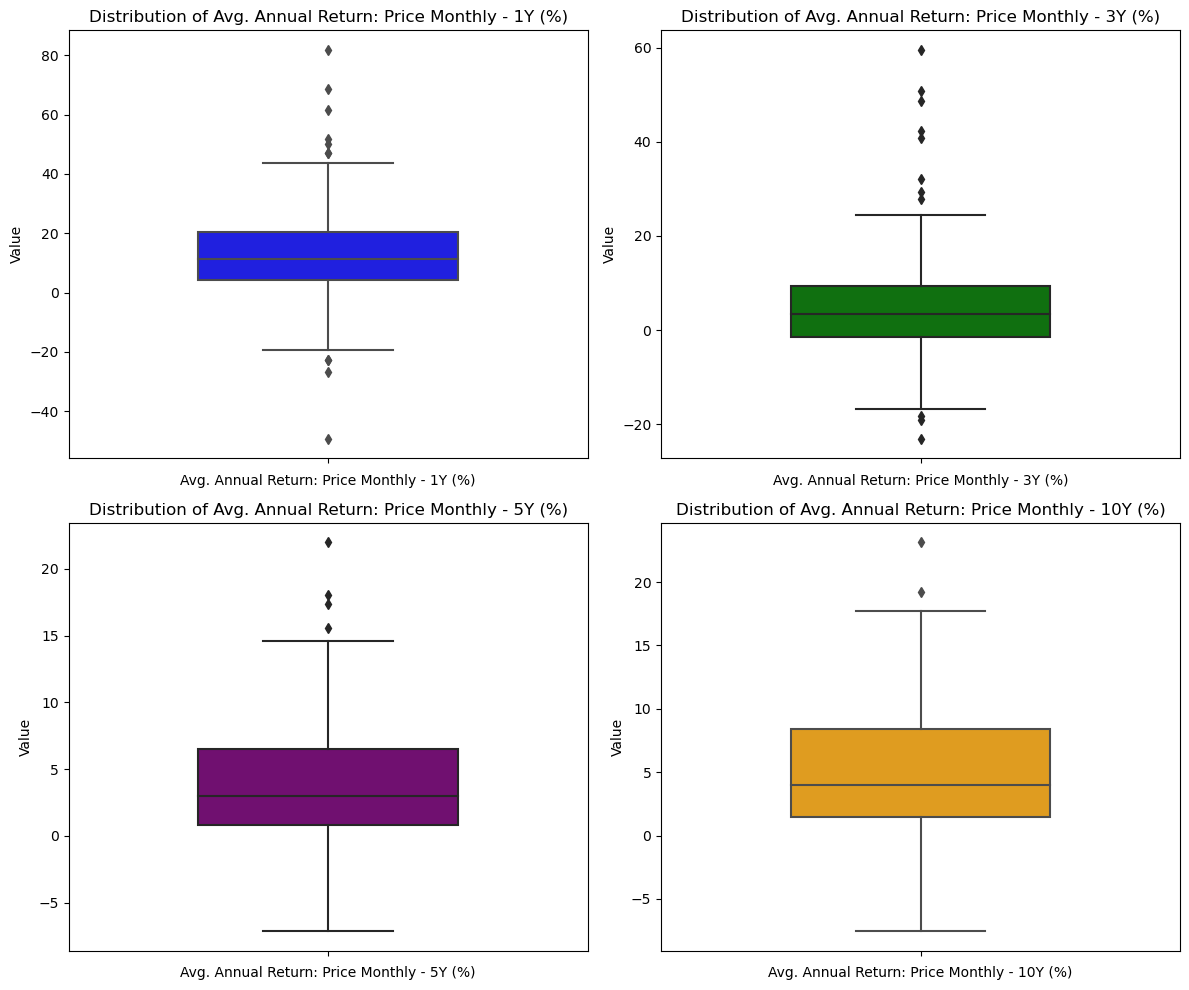

In [12]:
# Boxplots

# Columns selected
selected_returns = [
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

colors = ['blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, column, color in zip(axes.flatten(), selected_returns, colors):
    sns.boxplot(y=df_selected[column].dropna().astype(float), color=color, ax=ax, width=0.5)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Value')
    ax.grid(False)

plt.tight_layout()
plt.show()

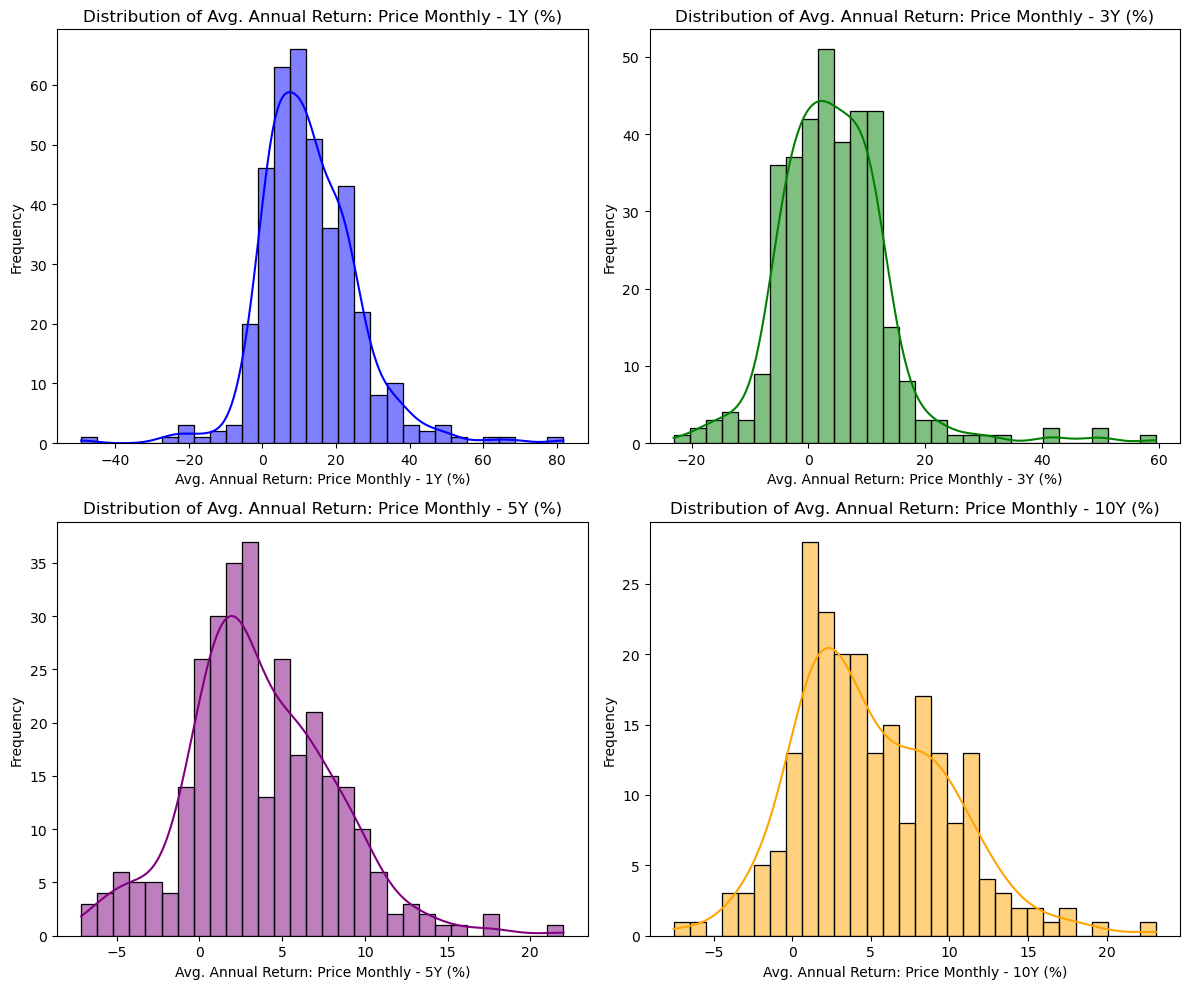

In [13]:
# Histogram

colors = ['blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for ax, column, color in zip(axes.flatten(), selected_returns, colors):
    sns.histplot(df_selected[column].dropna().astype(float), bins=30, kde=True, 
                 color=color, edgecolor='black', ax=ax)    
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

plt.tight_layout()
plt.show()

Now that we have conducted a thorough exploration and cleansing of our data, our attention shifts to the analytical phase of our project.

Our next step is to identify the most effective approach for selecting the top 10 ETFs, focusing specifically on their respective returns.

The methodology we choose for calculating profitability is crucial and largely depends on the context of our analysis and the goals we aim to achieve.

For this particular scenario, we have decided to employ the concept of compound returns to guide our selection process. This approach takes into account the cumulative effect of returns over time, providing a more holistic and realistic assessment of the ETFs' performance.

Compound Return refers to the process where the interest or returns earned in one period also generate returns in subsequent periods. In other words, it's "interest on interest" or "return on return." It's a way to measure how an investment grows over time, taking into account the reinvestment of returns.

Imagine that you invest in an ETF that gives you a 10% return in the first year. If your initial investment was 100, at the end of the year you would have 110. If in the second year, the ETF gives you another 10% return, it is not calculated on the initial 100, but on the 110 you have at the beginning of the second year. Thus, at the end of the second year, you would have 121 and not just 120. This additional increase of 1 is the result of compound return.

The formula for compound return over n periods is:

(1+r1)×(1+r2)×…×(1+rn)−1

Where r1,r2,…,rn are the returns for each period.

In our case, for a particular ETF, the compound return over 10 years, considering the annual returns for 1 year, 3 years, 5 years, and 10 years, would be:

Compound Return = (1 + (r1y/100))^1 x (1 + (r3y/300))^3 x (1 + (r5y/500))^5 x (1 + (r10y/1000))^10


We will calculate the compound return for each ETF and then identify the "top 10" based on this metric.

In [14]:
# Compound return for each ETF
df_selected['Compound Return'] = (
    (1 + df_selected["Avg. Annual Return: Price Monthly - 1Y (%)"]/100) *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 3Y (%)"]/300)**3 *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 5Y (%)"]/500)**5 *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"]/1000)**10 - 1
) * 100

# Top 10 ETFs with compound return
top_10_compound = df_selected.sort_values(by='Compound Return', ascending=False).head(10)
top_10_compound[['Ticker', 'Name', 'Compound Return']]

Ticker                                               Name  Compound Return
62    SOXX                          iShares Semiconductor ETF       176.028032
282    TUR                            iShares MSCI Turkey ETF       172.780553
170    IEO  iShares U.S. Oil & Gas Exploration & Productio...       137.105083
243    IEZ          iShares U.S. Oil Equipment & Services ETF       134.981197
137    ITB                 iShares U.S. Home Construction ETF       134.956182
44     IYW                        iShares U.S. Technology ETF       132.097753
148    IYE                            iShares U.S. Energy ETF       116.931261
117    IXC                          iShares Global Energy ETF       114.490077
101    IXN                            iShares Global Tech ETF       112.274567
304   FILL           iShares MSCI Global Energy Producers ETF       105.930134

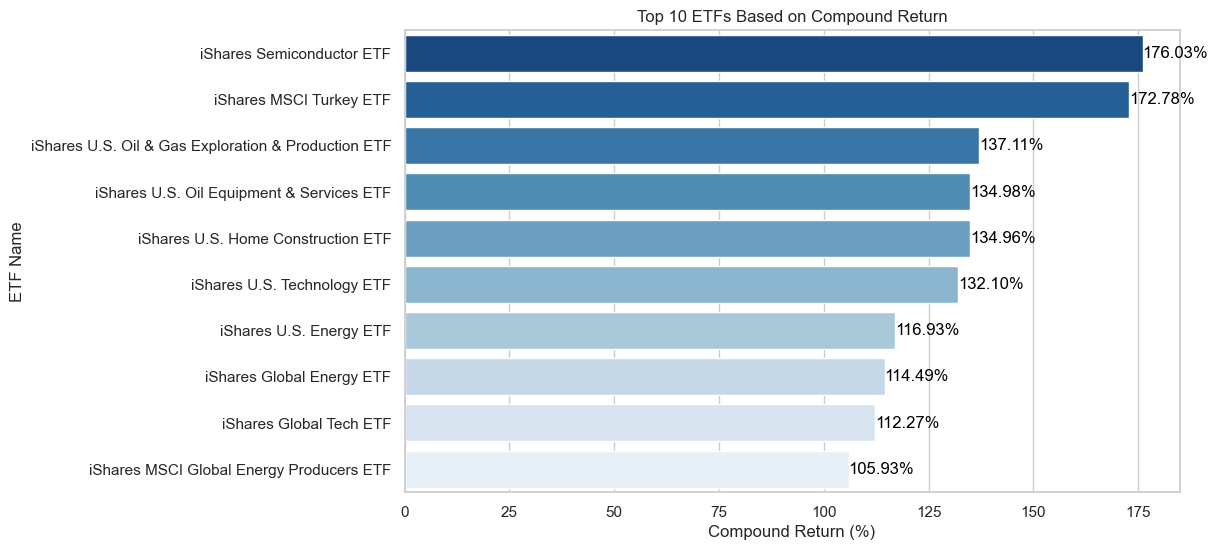

In [15]:
# Barplot
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Compound Return', y='Name', data=top_10_compound, palette='Blues_r')

for index, value in enumerate(top_10_compound['Compound Return']):
    plt.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.title('Top 10 ETFs Based on Compound Return')
plt.xlabel('Compound Return (%)')
plt.ylabel('ETF Name')

plt.show()

In [16]:
# Top 10 ETFs based on 10-year returns
top_10_10_years = df_selected.sort_values(by="Avg. Annual Return: Price Monthly - 10Y (%)", ascending=False).head(10)
top_10_10_years[['Ticker', 'Name', 'Avg. Annual Return: Price Monthly - 10Y (%)']]

Ticker                                       Name  \
62    SOXX                  iShares Semiconductor ETF   
44     IYW                iShares U.S. Technology ETF   
101    IXN                    iShares Global Tech ETF   
105    IGM           iShares Expanded Tech Sector ETF   
80     IGV  iShares Expanded Tech-Software Sector ETF   
67     IWY         iShares Russell Top 200 Growth ETF   
222   SMIN           iShares MSCI India Small-Cap ETF   
3      IWF            iShares Russell 1000 Growth ETF   
137    ITB         iShares U.S. Home Construction ETF   
83     IHI           iShares U.S. Medical Devices ETF   

     Avg. Annual Return: Price Monthly - 10Y (%)  
62                                     23.140869  
44                                     19.191494  
101                                    17.690000  
105                                    17.664976  
80                                     16.448680  
67                                     15.570100  
222                                    14.980000  
3                                      14.267450  
137                                    13.972729  
83                                     13.712762

In the graphical representation, it is clearly highlighted that the iShares Semiconductor ETF (SOXX) has the highest compound return. This observation is corroborated by the data presented in the table below, where SOXX also appears as the most profitable ETF, with a return of 23.14% over a 10-year period.

Given its excellent performance, we will proceed to perform a more detailed analysis of the SOXX ETF to understand how it is composed.

In [17]:
# Importing the dataset.

df_SOXX = pd.read_csv('SOXX_holdings_Modified.csv')

In [18]:
df_SOXX.head()

Ticker                        Name                  Sector Asset Class  \
0    AMD  ADVANCED MICRO DEVICES INC  Information Technology      Equity   
1   AVGO                BROADCOM INC  Information Technology      Equity   
2   NVDA                 NVIDIA CORP  Information Technology      Equity   
3   INTC      INTEL CORPORATION CORP  Information Technology      Equity   
4    TXN        TEXAS INSTRUMENT INC  Information Technology      Equity   

     Market Value  Weight (%)  Notional Value         Shares   Price  \
0  712,720,222.11        8.47  712,720,222.11   7,010,133.00  101.67   
1  707,559,525.52        8.41  707,559,525.52     803,032.00  881.11   
2  655,640,551.59        7.79  655,640,551.59   1,501,593.00  436.63   
3  567,706,991.40        6.75  567,706,991.40  16,412,460.00   34.59   
4  504,187,420.88        5.99  504,187,420.88   3,431,714.00  146.92   

        Location Exchange Currency  FX Rate Market Currency Accrual Date  
0  United States   NASDAQ      USD        1             USD            -  
1  United States   NASDAQ      USD        1             USD            -  
2  United States   NASDAQ      USD        1             USD            -  
3  United States   NASDAQ      USD        1             USD            -  
4  United States   NASDAQ      USD        1             USD            -

In [19]:
df_SOXX.shape

(35, 15)

In [20]:
df_SOXX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           35 non-null     object 
 1   Name             35 non-null     object 
 2   Sector           35 non-null     object 
 3   Asset Class      35 non-null     object 
 4   Market Value     35 non-null     object 
 5   Weight (%)       35 non-null     float64
 6   Notional Value   35 non-null     object 
 7   Shares           35 non-null     object 
 8   Price            35 non-null     object 
 9   Location         35 non-null     object 
 10  Exchange         35 non-null     object 
 11  Currency         35 non-null     object 
 12  FX Rate          35 non-null     int64  
 13  Market Currency  35 non-null     object 
 14  Accrual Date     35 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 4.2+ KB


In the following graph we can identify that the SOXX ETF is made up of 35 companies of which 30 companies are from the sector Information Technology and 5 companies are from the sector Derivatives.

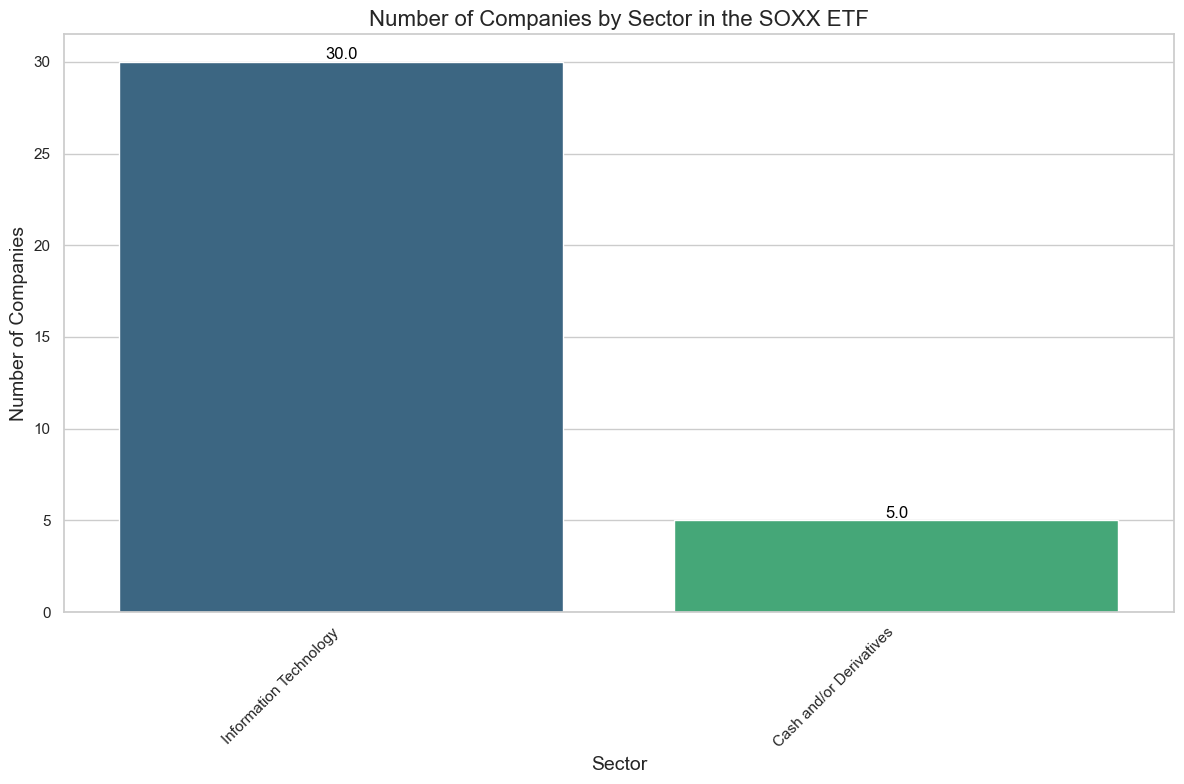

In [21]:
# Barplot Sector
sector_counts = df_SOXX['Sector'].value_counts()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=sector_counts.index, y=sector_counts.values, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Number of Companies by Sector in the SOXX ETF', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

The following graph is very important since it shows us the weight of each company within the SOXX ETF, where we can identify that technology companies are among the top positions with greater importance within the ETF.

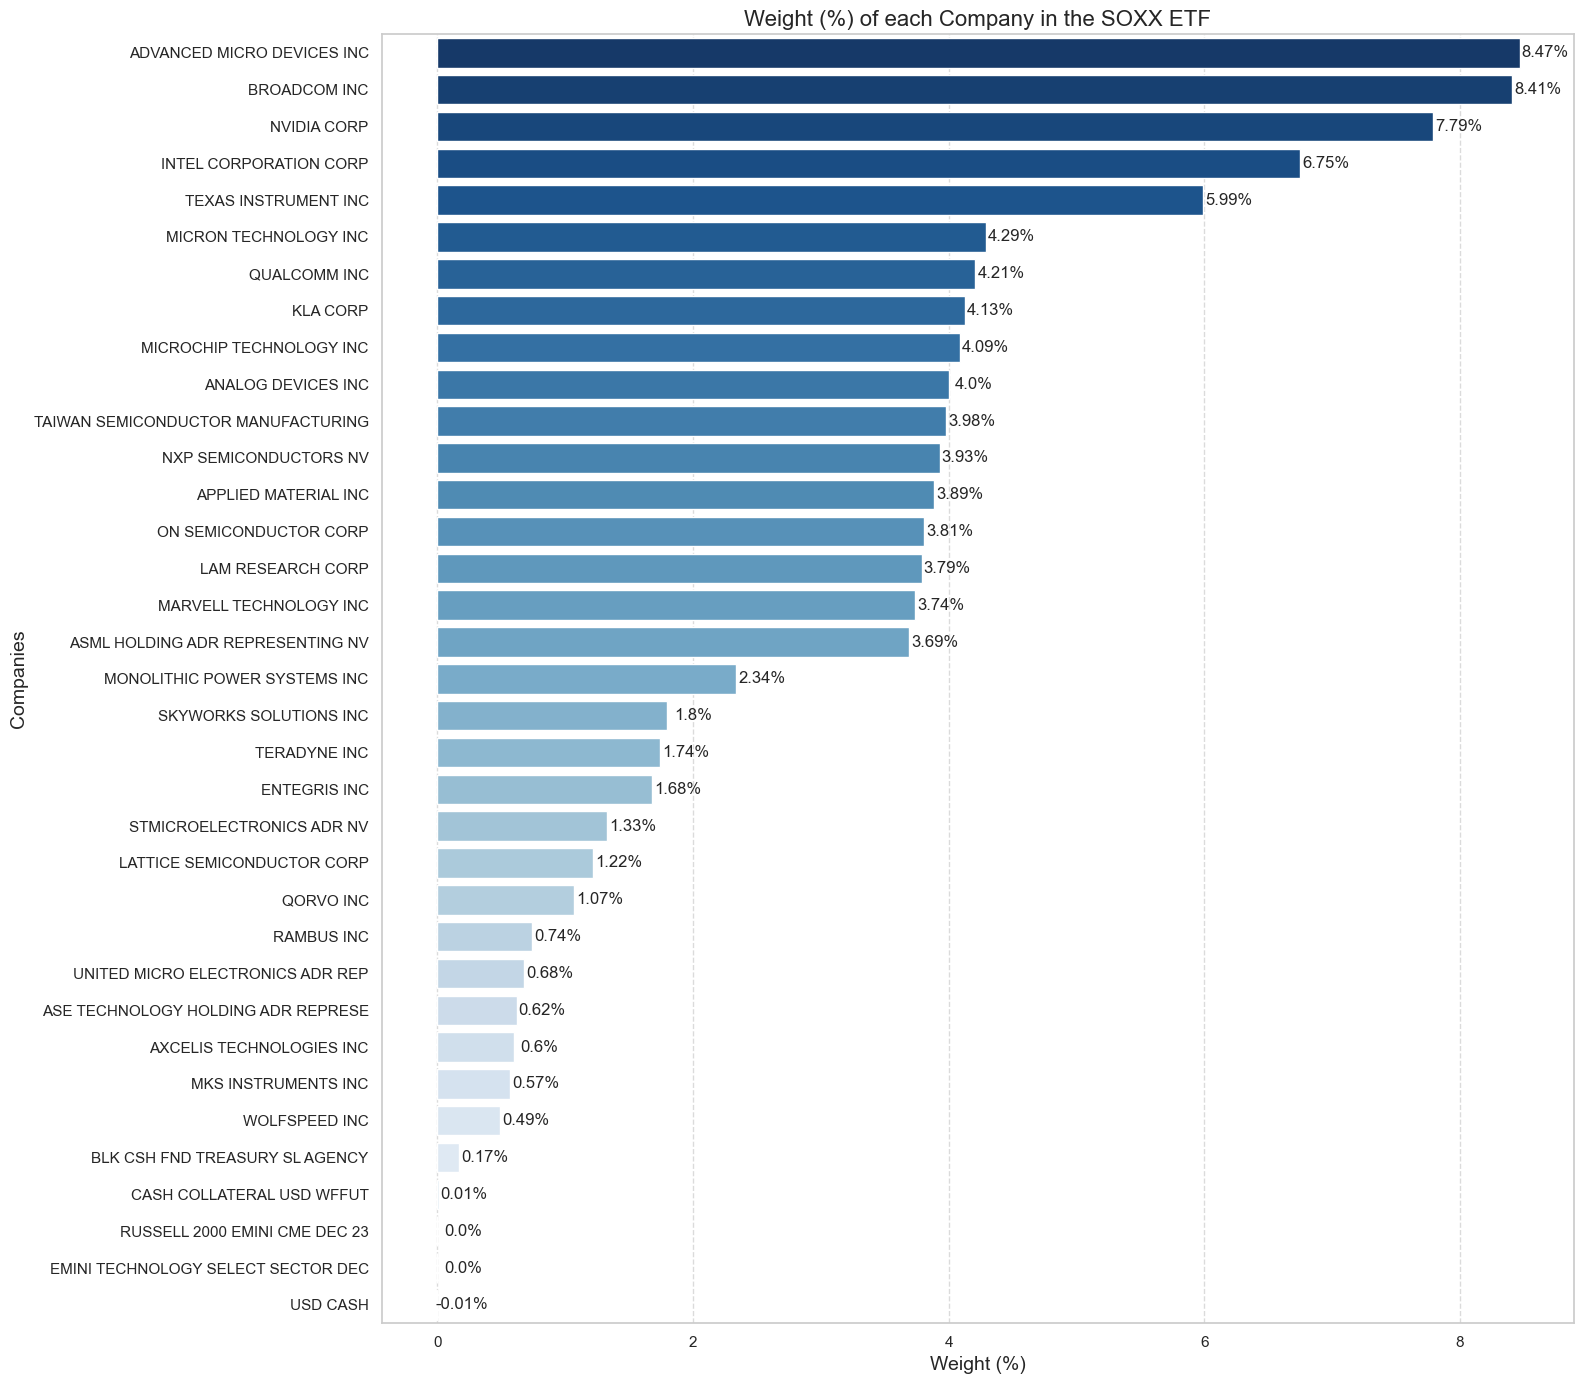

In [22]:
# Barplot Weight (%)

df_weight = df_SOXX[['Name', 'Weight (%)']].sort_values(by='Weight (%)', ascending=False)

plt.figure(figsize=(16, 14))
ax = sns.barplot(x='Weight (%)', y='Name', data=df_weight, palette='Blues_r')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.2, p.get_y() + p.get_height() / 2, f'{width}%', ha='center', va='center')

plt.title('Weight (%) of each Company in the SOXX ETF', fontsize=16)
plt.xlabel('Weight (%)', fontsize=14)
plt.ylabel('Companies', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Now we are going to carry out an analysis of the shares that make up the SOXX ETF and we are going to graph the behavior of the accumulated profitability over time.

In [23]:
# Importing the dataset.

df_SOXX_stocks = pd.read_excel('SOXX_holding_stocks.xlsx')

In [24]:
df_SOXX_stocks.head()

Date   Open   High    Low  Close  Volume  OpenInt Ticker  \
0 2005-02-25  35.36  35.36  33.96  35.12  283990        0   ACLS   
1 2005-02-28  35.00  36.08  34.28  34.40  185515        0   ACLS   
2 2005-03-01  34.64  35.92  34.60  35.52  155093        0   ACLS   
3 2005-03-02  35.56  35.80  34.60  35.08  140085        0   ACLS   
4 2005-03-03  35.28  35.44  33.52  34.56  135703        0   ACLS   

                       Name  
0  AXCELIS TECHNOLOGIES INC  
1  AXCELIS TECHNOLOGIES INC  
2  AXCELIS TECHNOLOGIES INC  
3  AXCELIS TECHNOLOGIES INC  
4  AXCELIS TECHNOLOGIES INC

In [25]:
df_SOXX_stocks.shape

(142977, 9)

In [26]:
df_SOXX_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142977 entries, 0 to 142976
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   Date     142977 non-null  datetime64[ns]
 1   Open     142977 non-null  float64       
 2   High     142977 non-null  float64       
 3   Low      142977 non-null  float64       
 4   Close    142977 non-null  float64       
 5   Volume   142977 non-null  int64         
 6   OpenInt  142977 non-null  int64         
 7   Ticker   142977 non-null  object        
 8   Name     142977 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 9.8+ MB


In [27]:
null_counts_stocks = df_SOXX_stocks.isnull().sum()
null_counts_stocks

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Ticker     0
Name       0
dtype: int64

In [28]:
df_SOXX_stocks.describe()

Open           High            Low          Close  \
count  142977.000000  142977.000000  142977.000000  142977.000000   
mean       19.907021      20.213916      19.586799      19.905984   
std        23.751549      24.007840      23.468734      23.755563   
min         0.007910       0.007910       0.007910       0.007910   
25%         5.450000       5.560200       5.328100       5.450000   
50%        13.338000      13.583000      13.080000      13.333000   
75%        25.224000      25.667000      24.776000      25.215000   
max       278.300000     281.800000     270.030000     277.530000   

             Volume   OpenInt  
count  1.429770e+05  142977.0  
mean   1.204015e+07       0.0  
std    2.175784e+07       0.0  
min    0.000000e+00       0.0  
25%    1.438234e+06       0.0  
50%    4.163423e+06       0.0  
75%    1.335720e+07       0.0  
max    7.079309e+08       0.0

In [29]:
# Check Duplicates
duplicates = df_SOXX_stocks[df_SOXX_stocks.duplicated()]
duplicates

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, OpenInt, Ticker, Name]
Index: []

In [30]:
# Convert 'Date' Column to Date Format
df_SOXX_stocks['Date'] = pd.to_datetime(df_SOXX_stocks['Date'])

In [31]:
# Sort the Data by Date and Company
df_SOXX_stocks_sorted = df_SOXX_stocks.sort_values(by=['Ticker', 'Date'])
df_SOXX_stocks_sorted

Date   Open   High    Low  Close   Volume  OpenInt Ticker  \
0      2005-02-25  35.36  35.36  33.96  35.12   283990        0   ACLS   
1      2005-02-28  35.00  36.08  34.28  34.40   185515        0   ACLS   
2      2005-03-01  34.64  35.92  34.60  35.52   155093        0   ACLS   
3      2005-03-02  35.56  35.80  34.60  35.08   140085        0   ACLS   
4      2005-03-03  35.28  35.44  33.52  34.56   135703        0   ACLS   
...           ...    ...    ...    ...    ...      ...      ...    ...   
142972 2017-11-06   2.54   2.55   2.54   2.55   247481        0    UMC   
142973 2017-11-07   2.55   2.57   2.53   2.53   379809        0    UMC   
142974 2017-11-08   2.55   2.55   2.53   2.55   208356        0    UMC   
142975 2017-11-09   2.58   2.60   2.56   2.58  1372819        0    UMC   
142976 2017-11-10   2.60   2.61   2.59   2.59  2065566        0    UMC   

                                    Name  
0               AXCELIS TECHNOLOGIES INC  
1               AXCELIS TECHNOLOGIES INC  
2               AXCELIS TECHNOLOGIES INC  
3               AXCELIS TECHNOLOGIES INC  
4               AXCELIS TECHNOLOGIES INC  
...                                  ...  
142972  UNITED MICRO ELECTRONICS ADR REP  
142973  UNITED MICRO ELECTRONICS ADR REP  
142974  UNITED MICRO ELECTRONICS ADR REP  
142975  UNITED MICRO ELECTRONICS ADR REP  
142976  UNITED MICRO ELECTRONICS ADR REP  

[142977 rows x 9 columns]

For this step, we will check for negative or zero closing prices, which would be anomalous for stock data.

In [32]:
# Verify Inconsistent or Anomalous Data
anomalous_data = df_SOXX_stocks_sorted[df_SOXX_stocks_sorted['Close'] <= 0]
anomalous_data

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume, OpenInt, Ticker, Name]
Index: []

In [33]:
# Daily Profitability of Each stock
df_SOXX_stocks_sorted['Daily_Return'] = df_SOXX_stocks_sorted.groupby('Ticker')['Close'].pct_change()

df_SOXX_stocks_sorted.head()

Date   Open   High    Low  Close  Volume  OpenInt Ticker  \
0 2005-02-25  35.36  35.36  33.96  35.12  283990        0   ACLS   
1 2005-02-28  35.00  36.08  34.28  34.40  185515        0   ACLS   
2 2005-03-01  34.64  35.92  34.60  35.52  155093        0   ACLS   
3 2005-03-02  35.56  35.80  34.60  35.08  140085        0   ACLS   
4 2005-03-03  35.28  35.44  33.52  34.56  135703        0   ACLS   

                       Name  Daily_Return  
0  AXCELIS TECHNOLOGIES INC           NaN  
1  AXCELIS TECHNOLOGIES INC     -0.020501  
2  AXCELIS TECHNOLOGIES INC      0.032558  
3  AXCELIS TECHNOLOGIES INC     -0.012387  
4  AXCELIS TECHNOLOGIES INC     -0.014823

In [34]:
# Calculation of the Average Daily Return of the Portfolio
# Group by date and average daily returns for all stocks
portfolio_daily_return = df_SOXX_stocks_sorted.groupby('Date')['Daily_Return'].mean()

# Transform the result into a Data Frame for better visualization
portfolio_daily_return_df = portfolio_daily_return.reset_index()

portfolio_daily_return_df.head()

Date  Daily_Return
0 1972-01-07           NaN
1 1972-01-14     -0.503141
2 1972-01-21      0.000000
3 1972-01-24      0.000000
4 1972-01-25      0.000000

In [35]:
# Cumulative Return
portfolio_daily_return_df['Cumulative_Return'] = (1 + portfolio_daily_return_df['Daily_Return']).cumprod()

# Replace infinite values with NaN and impute those NaN with 1 (representing a cumulative return of 0%)
portfolio_daily_return_df['Cumulative_Return'].replace([np.inf, -np.inf], np.nan, inplace=True)
portfolio_daily_return_df['Cumulative_Return'].fillna(1, inplace=True)

portfolio_daily_return_df.head()

Date  Daily_Return  Cumulative_Return
0 1972-01-07           NaN           1.000000
1 1972-01-14     -0.503141           0.496859
2 1972-01-21      0.000000           0.496859
3 1972-01-24      0.000000           0.496859
4 1972-01-25      0.000000           0.496859

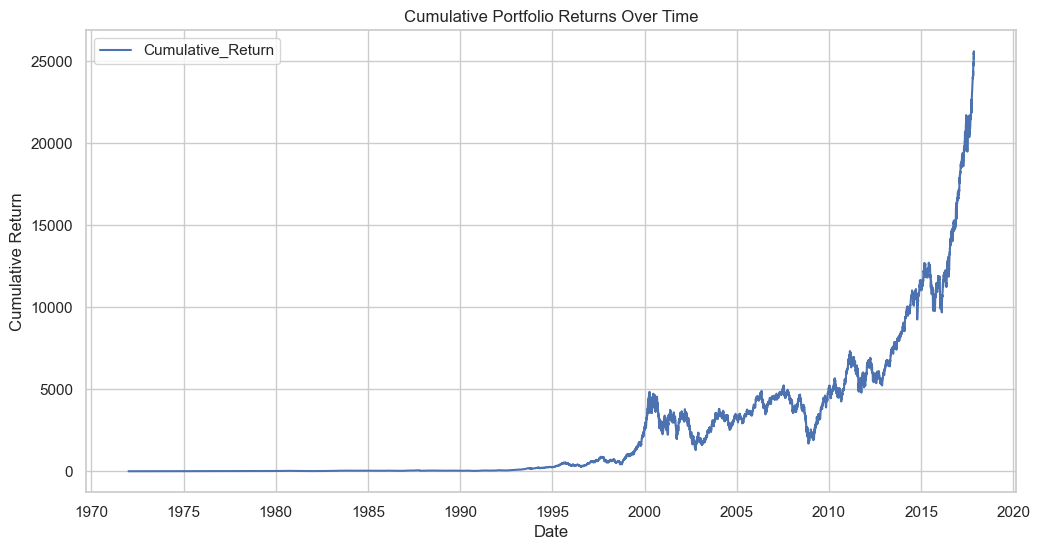

In [36]:
# Graph Cumulative Return
plt.figure(figsize=(12, 6))

plt.plot(portfolio_daily_return_df['Date'], portfolio_daily_return_df['Cumulative_Return'], label='Cumulative_Return')

plt.title('Cumulative Portfolio Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

plt.legend()

plt.grid(True)
plt.show()

After the previous analysis, we will take the shares of the company ADVANCED MICRO DEVICES INC (AMD) since it is the one that has the greatest weight within the portfolio with 8.47%

# Data Preparation (Linear Regression Model)

Data preparation is a crucial phase in our project and it involves several key steps to ensure that the data is in a suitable format for analysis. Given our focus on predicting ETFS profitability, the following data preparation steps are essential. Historical data for ETFs is collected, including the opening and closing prices of stocks within these ETFs. We ensure data quality by checking for missing values, outliers, and data inconsistencies.

Data from various sources is combined into a unified dataset, aligning the timeframes and formats, and identifying the most relevant features or attributes for our analysis. In our case, these may include stock prices, profit return, and potentially other financial indicators. Data is normalized where necessary and create additional features that might be more informative for predicting profitability, such as moving averages, volatility measures, or relative strength indicators.

As we are dealing with time prediction, we ensure proper time-based splitting and validation techniques to account for temporal dependencies. By meticulously preparing the data, we set the stage for creating accurate and reliable predictive models to estimate the profitability of the ETSs accurately.

In [37]:
#Filtrar los Datos para la Empresa AMD:
amd_data = df_SOXX_stocks_sorted[df_SOXX_stocks['Ticker'] == 'AMD']

# Filtrar por Fecha (Desde 2007 Hasta 2017):
amd_data_10_years = amd_data[(amd_data['Date'] >= '2007-01-01') & (amd_data['Date'] <= '2017-12-31')]

# Ordenar los Datos por Fecha:
amd_data_10_years = amd_data_10_years.sort_values(by='Date')

amd_data_10_years.head()

Date   Open   High    Low  Close    Volume  OpenInt Ticker  \
25964 2007-01-03  20.08  20.40  19.35  19.52  28107900        0    AMD   
25965 2007-01-04  19.66  19.86  19.32  19.79  23380300        0    AMD   
25966 2007-01-05  19.54  19.91  19.54  19.71  15772600        0    AMD   
25967 2007-01-08  19.71  19.86  19.25  19.47  15814600        0    AMD   
25968 2007-01-09  19.45  19.71  19.37  19.65  14098100        0    AMD   

                             Name  Daily_Return  
25964  ADVANCED MICRO DEVICES INC     -0.040786  
25965  ADVANCED MICRO DEVICES INC      0.013832  
25966  ADVANCED MICRO DEVICES INC     -0.004042  
25967  ADVANCED MICRO DEVICES INC     -0.012177  
25968  ADVANCED MICRO DEVICES INC      0.009245

In [38]:
# Cálculo de la Rentabilidad Acumulada
amd_data_10_years['Cumulative_Return'] = (1 + amd_data_10_years['Daily_Return']).cumprod()

In [39]:
amd_data_10_years.head()

Date   Open   High    Low  Close    Volume  OpenInt Ticker  \
25964 2007-01-03  20.08  20.40  19.35  19.52  28107900        0    AMD   
25965 2007-01-04  19.66  19.86  19.32  19.79  23380300        0    AMD   
25966 2007-01-05  19.54  19.91  19.54  19.71  15772600        0    AMD   
25967 2007-01-08  19.71  19.86  19.25  19.47  15814600        0    AMD   
25968 2007-01-09  19.45  19.71  19.37  19.65  14098100        0    AMD   

                             Name  Daily_Return  Cumulative_Return  
25964  ADVANCED MICRO DEVICES INC     -0.040786           0.959214  
25965  ADVANCED MICRO DEVICES INC      0.013832           0.972482  
25966  ADVANCED MICRO DEVICES INC     -0.004042           0.968550  
25967  ADVANCED MICRO DEVICES INC     -0.012177           0.956757  
25968  ADVANCED MICRO DEVICES INC      0.009245           0.965602

## Creation and Identification of Dependent Variables and Independent Variables for the Model

Projection of 10-Year Accumulated Return: Dependent Variable (y)

To calculate the projected accumulated return over the next ten years, it is necessary to adjust the accumulated return column by shifting it 10 years back in time. Given that our data is recorded on a daily basis, and considering that a typical trading year consists of approximately 252 trading days, this entails shifting the column by 2520 days (10 years x 252 days/year).

However, it is crucial to take into account an important aspect: by moving the data back in time, the last 2520 rows of our dataset will be left without a corresponding value for the 10-year accumulated return. This is because we are presently in the moment, and therefore, we do not have future data for those specific days. To address this issue, we are left with the options of either removing those rows from our dataset or alternatively, filling in those values in some way. In this particular case, we will choose to replace the missing values (NaN) with the Mean of the dataset.

In [40]:
amd_data_10_years['Cumulative_Return_10y'] = amd_data_10_years['Cumulative_Return'].shift(-2520)

In [41]:
amd_data_10_years.head()

Date   Open   High    Low  Close    Volume  OpenInt Ticker  \
25964 2007-01-03  20.08  20.40  19.35  19.52  28107900        0    AMD   
25965 2007-01-04  19.66  19.86  19.32  19.79  23380300        0    AMD   
25966 2007-01-05  19.54  19.91  19.54  19.71  15772600        0    AMD   
25967 2007-01-08  19.71  19.86  19.25  19.47  15814600        0    AMD   
25968 2007-01-09  19.45  19.71  19.37  19.65  14098100        0    AMD   

                             Name  Daily_Return  Cumulative_Return  \
25964  ADVANCED MICRO DEVICES INC     -0.040786           0.959214   
25965  ADVANCED MICRO DEVICES INC      0.013832           0.972482   
25966  ADVANCED MICRO DEVICES INC     -0.004042           0.968550   
25967  ADVANCED MICRO DEVICES INC     -0.012177           0.956757   
25968  ADVANCED MICRO DEVICES INC      0.009245           0.965602   

       Cumulative_Return_10y  
25964               0.552334  
25965               0.556265  
25966               0.564619  
25967               0.562162  
25968               0.550369

In [42]:
# Replace NaN values with Mean
amd_data_10_years = amd_data_10_years.fillna(amd_data_10_years.mean())

In [43]:
# Split the dataset into X and y columns
features = ['Daily_Return', 'Cumulative_Return']
X = amd_data_10_years[features] # Independent variable 
y = amd_data_10_years['Cumulative_Return_10y'] # Dependent variable

X, y

(       Daily_Return  Cumulative_Return
 25964     -0.040786           0.959214
 25965      0.013832           0.972482
 25966     -0.004042           0.968550
 25967     -0.012177           0.956757
 25968      0.009245           0.965602
 ...             ...                ...
 28695      0.072842           0.586241
 28696      0.010059           0.592138
 28697     -0.028216           0.575430
 28698     -0.050384           0.546437
 28699      0.012590           0.553317
 
 [2736 rows x 2 columns],
 25964    0.552334
 25965    0.556265
 25966    0.564619
 25967    0.562162
 25968    0.550369
            ...   
 28695    0.623180
 28696    0.623180
 28697    0.623180
 28698    0.623180
 28699    0.623180
 Name: Cumulative_Return_10y, Length: 2736, dtype: float64)

## Modeling and Evaluation Linear Regression Model

The modelling phase is the core of the project, where predictive models are used to estimate ETS profitability using regression and time series modelling techniques. In the selection of the models, two primary modelling techniques were used: Linear Regression and Time Series Analysis.

Develop a linear regression model using the training data. This model should aim to predict ETF profitability based on the selected stock-related features, considering their linear relationships.

Build a time series model using the training data. In this case, it captures the temporal patterns and seasonality of the ETS profitability, considering historical time-based data.

For assessing the performance of predictive models, the evaluation step is important, this phase involves various activities to measure the effectiveness and reliability of the models in determining ETF profitability. Appropriate evaluation metrics are defined as tailored to the project goals. Common metrics for evaluating regression models, which are used for predicting financial values like profitability, may include Mean Squared Error (MAE). Subsequently, compare the performance of both machine learning models to determine which one provides more accurate predictions.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# 80 Train - Test 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 2), (2736,), (2188, 2), (548, 2), (2188,), (548,))

In [45]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('Mean R^2 in Cross Validation CV Mean: ', np.mean(scores))
    print('Standard Deviation of R^2 in Cross Validation STD: ', np.std(scores))
    print('\n')

In [47]:
# Trainning Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
get_cv_scores(linear_model)

print('R^2:', r2)
print('Mean Square Error MSE:', mse)

Mean R^2 in Cross Validation CV Mean:  -0.0008656527421257332
Standard Deviation of R^2 in Cross Validation STD:  0.015083427325948503


R^2: -0.014176672089973197
Mean Square Error MSE: 0.0003068008509277524


**Cross Validation**

**Mean R^2:** This value is very close to 0, indicating that the model is not performing well in predicting the 10-year accumulated return. An R^2 value close to 1 would indicate a perfect model, while a value close to 0 or negative indicates a poor fit.

**Standard Deviation of R^2:** This value is relatively low, suggesting that the model's performance is quite consistent across different partitions in cross-validation. However, given that the average R^2 is almost zero, this consistency is not necessarily a positive aspect in this case.

The deficiency of the model could be due to multiple factors, but in this case, one issue we can observe is that we do not have enough features in our data to aid in a better prediction.

To improve the prediction, we will create and add some technical indicators commonly used in stock analysis to our data.

# Data Preparation with Technical Indicators 

**Technical Indicators:**

1. Simple Moving Average (SMA):

The SMA is the average of stock prices over a specific period. It helps to smooth out daily fluctuations and highlight long-term trends.

It is calculated by adding the closing prices of the stocks from the last 'n' days and dividing by 'n'. For example, for a 5-day moving average, we would add the closing prices from the last 5 days and divide by 5.

In this case, we will use a window of 5, 20, and 50 days.

This helps us identify the trend of an asset. When prices are above the SMA, it could indicate an uptrend, and when they are below, a downtrend.

2. RSI (Relative Strength Index):

The RSI is a technical analysis indicator used to identify overbought or oversold conditions in a financial market. The RSI is an oscillator that moves between 0 and 100, and is commonly used to assess the speed and change of an asset's price movements.

* How RSI is calculated:

2.1 - Calculation of Average Gains and Losses: For a given period (commonly 14 days), calculate the average of daily gains and losses. Gains are counted only if today's closing price is higher than yesterday's, and losses are counted only if it is lower.

2.2 - Calculation of RS (Relative Strength): Divide the average gains by the average losses.

2.3- RSI: 100 - (100 / 1 + RS)

* Interpretation of RSI:

Overbought: An RSI above 70 indicates overbought conditions, suggesting that the asset's price may be too high and a downward correction could occur.

Oversold: An RSI below 30 indicates oversold conditions, suggesting that the asset's price may be too low and an upward rebound could occur.

Buy/Sell Signals: Some traders use the RSI to identify potential reversal points in the market. For example, if the RSI moves out of the oversold zone and crosses the 30 level upwards, it could be a buy signal.

3. EMA (Exponential Moving Average)

The EMA is a type of moving average that gives more weight to the most recent prices, aiming to make it more responsive to price changes. Unlike the Simple Moving Average (SMA), which assigns the same weight to all prices, the EMA assigns more weight to the most recent prices.

* How EMA is calculated:

EMA(today) = (Close Value - EMA(yesterday)) x Multiplier + EMA(yesterday)

Where: Multiplier = 2 / Time frame + 1

For example, if we are calculating a 10-day EMA, we could use the SMA of the first 10 days as the EMA for the first day.

4. MACD (Moving Average Convergence Divergence):

The MACD is a technical analysis indicator used to identify the direction, duration, strength, and potential reversal points of a financial market's trend.

* Cómo se calcula el MACD:
MACD Line: Calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

MACD Line = EMA12 - EMA26

5. Signal Line
The 9-period EMA of the MACD Line

MACD = EMA9(MACD Line)

* Interpretation of MACD:

.- Trend: When the MACD Line is above the Signal Line, it is considered a bullish signal. When it is below, it is a bearish signal.

.- Crossovers: A crossover of the MACD Line above the Signal Line can be interpreted as a buy signal, while a crossover below can be a sell signal.

.- Divergence: When the price of an asset is making new highs or lows, but the MACD is not, it can indicate a weakness in the trend and a potential reversal.

6. Volatility:

Volatility is a statistical measure that describes the dispersion or variability of an asset's returns. In financial markets, volatility is commonly used to quantify the risk associated with investing in a particular asset.

Volatility is commonly measured as the standard deviation of the asset's returns. A high standard deviation indicates that the returns are more dispersed and therefore, the asset is more volatile.

In this case, we calculate volatility as the standard deviation of the stock's daily returns over a specific period (20 days).

In [48]:
# 1. SMA 
amd_data_10_years['SMA_5'] = amd_data_10_years['Close'].rolling(window=5).mean()
amd_data_10_years['SMA_20'] = amd_data_10_years['Close'].rolling(window=20).mean()
amd_data_10_years['SMA_50'] = amd_data_10_years['Close'].rolling(window=50).mean()

# 2. RSI
delta = amd_data_10_years['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
amd_data_10_years['RSI'] = 100 - (100 / (1 + rs))

# 3. EMA
amd_data_10_years['EMA_12'] = amd_data_10_years['Close'].ewm(span=12, adjust=False).mean()
amd_data_10_years['EMA_26'] = amd_data_10_years['Close'].ewm(span=26, adjust=False).mean()

# 4. MACD
amd_data_10_years['MACD'] = amd_data_10_years['EMA_12'] - amd_data_10_years['EMA_26']

# 5. Signal Line
amd_data_10_years['Signal_Line'] = amd_data_10_years['MACD'].ewm(span=9, adjust=False).mean()

# 6. Volatility:
amd_data_10_years['Volatility'] = amd_data_10_years['Daily_Return'].rolling(window=20).std()

amd_data_10_years.head()

Date   Open   High    Low  Close    Volume  OpenInt Ticker  \
25964 2007-01-03  20.08  20.40  19.35  19.52  28107900        0    AMD   
25965 2007-01-04  19.66  19.86  19.32  19.79  23380300        0    AMD   
25966 2007-01-05  19.54  19.91  19.54  19.71  15772600        0    AMD   
25967 2007-01-08  19.71  19.86  19.25  19.47  15814600        0    AMD   
25968 2007-01-09  19.45  19.71  19.37  19.65  14098100        0    AMD   

                             Name  Daily_Return  ...  Cumulative_Return_10y  \
25964  ADVANCED MICRO DEVICES INC     -0.040786  ...               0.552334   
25965  ADVANCED MICRO DEVICES INC      0.013832  ...               0.556265   
25966  ADVANCED MICRO DEVICES INC     -0.004042  ...               0.564619   
25967  ADVANCED MICRO DEVICES INC     -0.012177  ...               0.562162   
25968  ADVANCED MICRO DEVICES INC      0.009245  ...               0.550369   

        SMA_5  SMA_20  SMA_50  RSI     EMA_12     EMA_26      MACD  \
25964     NaN     NaN     NaN  NaN  19.520000  19.520000  0.000000   
25965     NaN     NaN     NaN  NaN  19.561538  19.540000  0.021538   
25966     NaN     NaN     NaN  NaN  19.584379  19.552593  0.031786   
25967     NaN     NaN     NaN  NaN  19.566782  19.546475  0.020307   
25968  19.628     NaN     NaN  NaN  19.579585  19.554143  0.025442   

       Signal_Line  Volatility  
25964     0.000000         NaN  
25965     0.004308         NaN  
25966     0.009803         NaN  
25967     0.011904         NaN  
25968     0.014612         NaN  

[5 rows x 21 columns]

In [49]:
# Replace NaN values with Mean
amd_data_10_years = amd_data_10_years.fillna(amd_data_10_years.mean())

In [50]:
# Split the dataset into X and y columns
features = ['Close', 'Volume', 'RSI', 'MACD', 'Signal_Line', 'Volatility', 'SMA_5', 'SMA_20', 'SMA_50']
X = amd_data_10_years[features]

# Cumulative Return 10 years
y = amd_data_10_years['Cumulative_Return_10y']

X, y

(       Close    Volume        RSI      MACD  Signal_Line  Volatility  \
 25964  19.52  28107900  50.070000  0.000000     0.000000    0.034565   
 25965  19.79  23380300  50.070000  0.021538     0.004308    0.034565   
 25966  19.71  15772600  50.070000  0.031786     0.009803    0.034565   
 25967  19.47  15814600  50.070000  0.020307     0.011904    0.034565   
 25968  19.65  14098100  50.070000  0.025442     0.014612    0.034565   
 ...      ...       ...        ...       ...          ...         ...   
 28695  11.93  96064339  29.946043 -0.569530    -0.347834    0.041718   
 28696  12.05  67788385  31.932021 -0.516473    -0.381562    0.041550   
 28697  11.71  58773505  30.722892 -0.496141    -0.404478    0.041601   
 28698  11.12  76576274  28.514377 -0.521623    -0.427907    0.041992   
 28699  11.26  50153776  26.759411 -0.524475    -0.447221    0.042244   
 
            SMA_5     SMA_20    SMA_50  
 25964   6.344643   6.295616   6.20374  
 25965   6.344643   6.295616   6.20374  

## Modeling and Evaluation with Linear Regression Model and Technical Indicators

The modelling phase is the core of the project, where predictive models are used to estimate ETS profitability using regression and time series modelling techniques. In the selection of the models, two primary modelling techniques were used: Linear Regression and Time Series Analysis.

Develop a linear regression model using the training data. This model should aim to predict ETF profitability based on the selected stock-related features, considering their linear relationships.

Build a time series model using the training data. In this case, it captures the temporal patterns and seasonality of the ETS profitability, considering historical time-based data.

For assessing the performance of predictive models, the evaluation step is important, this phase involves various activities to measure the effectiveness and reliability of the models in determining ETF profitability. Appropriate evaluation metrics are defined as tailored to the project goals. Common metrics for evaluating regression models, which are used for predicting financial values like profitability, may include Mean Squared Error (MAE). Subsequently, compare the performance of both machine learning models to determine which one provides more accurate predictions

In [51]:
# 80 Train - Test 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2736, 9), (2736,), (2188, 9), (548, 9), (2188,), (548,))

In [52]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('Mean R^2 in Cross Validation CV Mean: ', np.mean(scores))
    print('Standard Deviation of R^2 in Cross Validation STD: ', np.std(scores))
    print('\n')

In [54]:
# Trainning Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
get_cv_scores(linear_model)

print('R^2:', r2)
print('Mean Square Error MSE:', mse)

Mean R^2 in Cross Validation CV Mean:  0.2798949068082962
Standard Deviation of R^2 in Cross Validation STD:  0.1720323422619022


R^2: 0.4535388583028739
Mean Square Error MSE: 0.00016531118086766228


Cross Validation:

Average R^2 (Coefficient of Determination) in Cross-Validation (CV Mean): 0.2799 This indicates that, on average, the model is able to explain approximately 28% of the variability of the 10-year accumulated return in the training set during cross-validation. Unfortunately, this value is still too low, and we are unable to accurately predict the 10-year accumulated return.

Standard Deviation of R^2 in Cross-Validation (STD): 0.1720 This shows that there is significant variability in the model's performance across different partitions in cross-validation. A lower value would be ideal as it would indicate consistency in the model's performance.

# Data Preparation ARIMA Model

##  Stationary Time Series

In [55]:
# Stocks AMD Companie
df_AMD_stocks = df_SOXX_stocks[df_SOXX_stocks['Ticker'] == 'AMD']

In [56]:
df_AMD_stocks.head()

Date  Open  High   Low  Close  Volume  OpenInt Ticker  \
19963 1983-03-21  8.97  9.03  8.81   9.00  528000        0    AMD   
19964 1983-03-22  8.72  8.97  8.50   8.50  332400        0    AMD   
19965 1983-03-23  8.50  8.81  8.47   8.72  442400        0    AMD   
19966 1983-03-24  8.72  8.78  8.66   8.78  412000        0    AMD   
19967 1983-03-25  8.91  9.06  8.75   8.88  216400        0    AMD   

                             Name  
19963  ADVANCED MICRO DEVICES INC  
19964  ADVANCED MICRO DEVICES INC  
19965  ADVANCED MICRO DEVICES INC  
19966  ADVANCED MICRO DEVICES INC  
19967  ADVANCED MICRO DEVICES INC

In [57]:
# Filter the data from 2007 to date
df_AMD_stocks = df_AMD_stocks[df_AMD_stocks['Date'] >= '2007-01-01']

In [58]:
# Delete column 'OpenInt', 'Ticker', 'Name'
df_AMD_stocks = df_AMD_stocks.drop(columns=['OpenInt', 'Ticker', 'Name'])

In [59]:
df_AMD_stocks.head()

Date   Open   High    Low  Close    Volume
25964 2007-01-03  20.08  20.40  19.35  19.52  28107900
25965 2007-01-04  19.66  19.86  19.32  19.79  23380300
25966 2007-01-05  19.54  19.91  19.54  19.71  15772600
25967 2007-01-08  19.71  19.86  19.25  19.47  15814600
25968 2007-01-09  19.45  19.71  19.37  19.65  14098100

In [60]:
# Drop null values from the dataframe
df_AMD_stocks = df_AMD_stocks.dropna()

# Display the sumof null values
df_AMD_stocks.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [61]:
# Display the information of the dataframe
df_AMD_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2736 entries, 25964 to 28699
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2736 non-null   datetime64[ns]
 1   Open    2736 non-null   float64       
 2   High    2736 non-null   float64       
 3   Low     2736 non-null   float64       
 4   Close   2736 non-null   float64       
 5   Volume  2736 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 149.6 KB


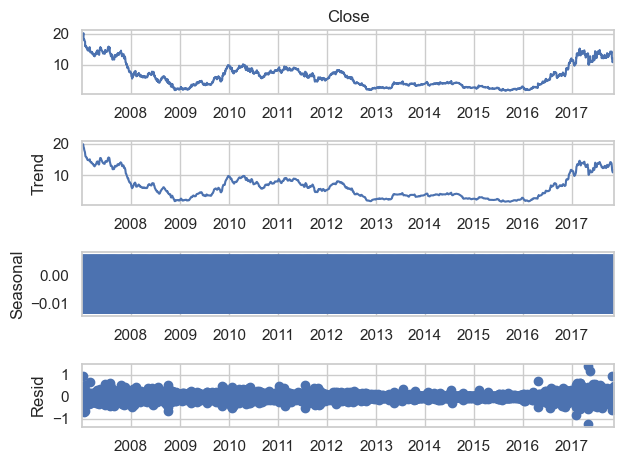

In [62]:
# Automatic Time Series Decomposition
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Load the DataFrame
df_AMD_stocks = pd.read_csv('df_AMD_stocks.csv')

# Convert 'Date' column to date format and set it as index
df_AMD_stocks['Date'] = pd.to_datetime(df_AMD_stocks['Date'])
df_AMD_stocks.set_index('Date', inplace=True)

# Sort the DataFrame by date index
df_AMD_stocks.sort_index(inplace=True)

# Frequency of the observations freg = 'B' business days
df_AMD_stocks = df_AMD_stocks.asfreq('B')

# interpolate() means replacement of values if some data is missed
df_AMD_stocks.interpolate(method='time', inplace=True)

# decompose the data using seasonal_decompose() function in the column 'Close'
result = seasonal_decompose(df_AMD_stocks['Close'], model='additive')

result.plot()
pyplot.show()

## Checks for Stationarity

### Summary Statistics

A quick and dirty check to see if our time series is not stationary is to check the summary statistics. Let's divide the time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely not stationary.

Ref: Chapter 15 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [63]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 = df_AMD_stocks.iloc[:125].Close.mean(), df_AMD_stocks.iloc[125:].Close.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = df_AMD_stocks.iloc[:125].Close.var(), df_AMD_stocks.iloc[125:].Close.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 14.836640, mean2 = 5.958881
variance1 = 2.873237, variance2 = 11.511095


Como podemos observar, el resultado de las Medias y las Varianzas de cada grupo son diferentes, lo que sugiere que nuestra serie temporal es estacionaria. Sin embargo, para determinar si una diferencia es estadísticamente significativa, comúnmente se utiliza una prueba estadística que proporciona un p-valor. El p-valor indica la probabilidad de observar un resultado tan extremo como el observado, bajo la hipótesis nula (la hipótesis de que no hay efecto o diferencia).

Criterios comunes para la significancia estadística:

p-value < 0.05: Se considera estadísticamente significativo.

p-value < 0.01: Se considera muy estadísticamente significativo.

p-value < 0.001: Se considera extremadamente estadísticamente significativo.

Dicho lo anterior calcularemos a continuacion a traves de la prueba ADF el p-value para nuestra serie de tiempo.

### Augmented Dickey-Fuller test

La prueba ADF es una prueba de raíz unitaria utilizada para determinar si una serie temporal es estacionaria. La hipótesis nula (H0) de la prueba ADF es que la serie temporal tiene una raíz unitaria, lo que implica que no es estacionaria. Tiene una tendencia estocástica. Por otro lado, la hipótesis alternativa (H1) es que la serie temporal no tiene una raíz unitaria, lo que implica que es estacionaria.

Ref: Chapter 15 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

In [64]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

df = read_csv('df_AMD_stocks.csv', header=0, index_col=0, parse_dates=True)
X = df['Close'].dropna()
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.902856
p-value: 0.045017
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


De acuerdo a los resultados:

ADF Statistic: -2.902856

Este valor se compara con los valores críticos. Si el estadístico ADF es menor que el valor crítico, podemos rechazar la hipótesis nula con un nivel de confianza del 5%, lo que sugiere que la serie temporal es estacionaria.

p-value: 0.045017

Este valor nos dice la probabilidad de que la serie temporal tenga una raíz unitaria. Un p-value bajo (menor que 0.05) significa que podemos rechazar la hipótesis nula y asumir que la serie temporal es estacionaria y se considera estadísticamente significativo.

Critical Values:

1%: -3.433

5%: -2.863

10%: -2.567

Estos son los valores críticos para los niveles de confianza del 1%, 5% y 10%, respectivamente. Si el estadístico ADF es menor que estos valores, podemos rechazar la hipótesis nula con ese nivel de confianza.


### Use and Remove Trends

Our time series data set may contain a trend. A trend is a continuous increase or decrease in the series over time.
Trends can make a time series non-stationary by introducing a systematic change in the mean of the series over time.
Removing trends makes it easier to model remaining patterns in the data, which can result in more accurate predictions.

In the graph, we can identify that there is no strong trend in the data since the line is relatively flat. But that trend was eliminated anyway through Detrend by Differencing.

Perhaps the simplest method to detrend a time series is by differencing. Specifically, a new series is constructed where the value at the current time step is calculated as the difference between the original observation and the observation at the previous time step.

value(t) = observation(t) − observation(t − 1)

This has the effect of removing a trend from a time series dataset.

Ref: Chapter 13 - Copyright Introduction to Time Series Forecasting with Python © Copyright 2020 Jason Brownlee. All Rights Reserved.

This step that we have just performed is step I of the ARIMA model which I (Integrated): The use of differentiation of raw observations (i.e., subtracting an observation from an observation in the previous time step) to make the time series stationary.

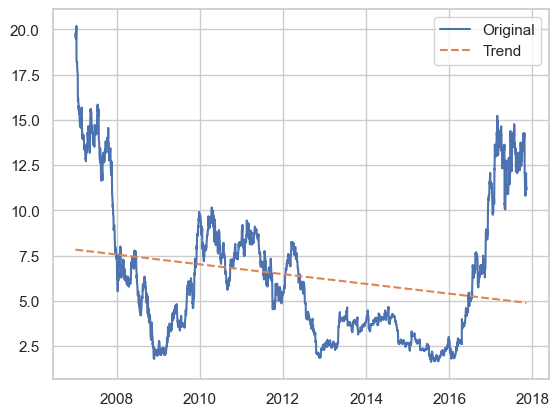

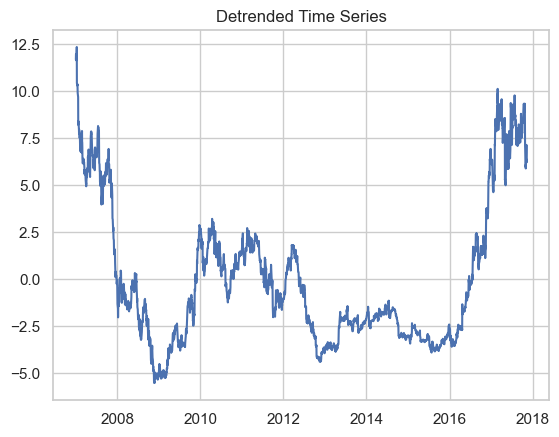

In [65]:
# use a linear model to detrend a time series
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy as np

df_AMD_stocks = pd.read_csv('df_AMD_stocks.csv', index_col=0, parse_dates=True)

# Ensure that the DataFrame is sorted by date
df_AMD_stocks.sort_index(inplace=True)

# fit linear model
X = np.array(range(len(df_AMD_stocks))).reshape(-1, 1)
y = df_AMD_stocks['Close'].values
model = LinearRegression()
model.fit(X, y)

# calculate trend
trend = model.predict(X)

# plot trend
pyplot.plot(df_AMD_stocks.index, y, label='Original')
pyplot.plot(df_AMD_stocks.index, trend, label='Trend', linestyle='--')
pyplot.legend()
pyplot.show()

# Detrend
detrended = y - trend

# plot detrend
pyplot.plot(df_AMD_stocks.index, detrended)
pyplot.title('Detrended Time Series')
pyplot.show()


## ARIMA Model

The modelling phase is the core of the project, where predictive models are used to estimate ETS profitability using regression and time series modelling techniques. In the selection of the models, two primary modelling techniques were used: Linear Regression and Time Series Analysis.

Develop a linear regression model using the training data. This model should aim to predict ETF profitability based on the selected stock-related features, considering their linear relationships.

Build a time series model using the training data. In this case, it captures the temporal patterns and seasonality of the ETS profitability, considering historical time-based data.

For assessing the performance of predictive models, the evaluation step is important, this phase involves various activities to measure the effectiveness and reliability of the models in determining ETF profitability. Appropriate evaluation metrics are defined as tailored to the project goals. Common metrics for evaluating regression models, which are used for predicting financial values like profitability, may include Mean Squared Error (MAE). Subsequently, compare the performance of both machine learning models to determine which one provides more accurate predictions

In [66]:
# import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa
import warnings
warnings.filterwarnings("ignore")

In [67]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 30, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

In [68]:
# Display first 10 records
df_AMD_stocks.head(10)

Open   High    Low  Close     Volume
Date                                             
2007-01-03  20.08  20.40  19.35  19.52   28107900
2007-01-04  19.66  19.86  19.32  19.79   23380300
2007-01-05  19.54  19.91  19.54  19.71   15772600
2007-01-08  19.71  19.86  19.25  19.47   15814600
2007-01-09  19.45  19.71  19.37  19.65   14098100
2007-01-10  19.64  20.02  19.50  20.01   19779800
2007-01-11  19.80  20.63  19.80  20.18   22469800
2007-01-12  18.63  18.77  17.62  18.26  122841504
2007-01-16  18.15  18.35  17.95  18.13   36731100
2007-01-17  17.90  18.28  17.90  18.20   21396200

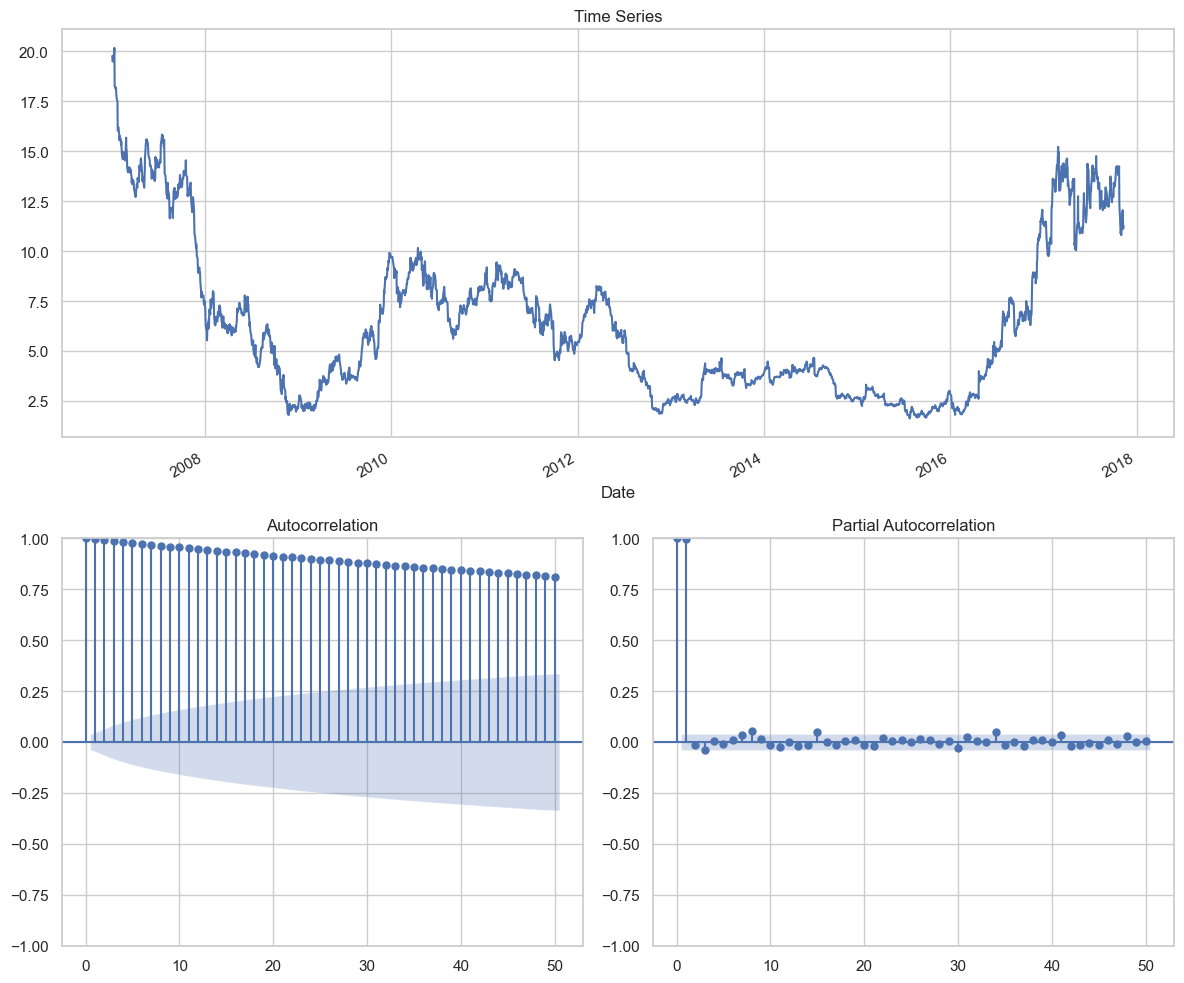

In [69]:
# Display plot of close column and Date index
plotds(df_AMD_stocks['Close'], nlag = 50)

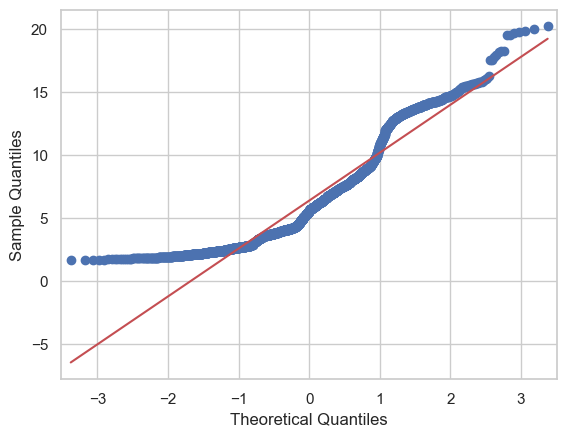

In [70]:
# qqplot for the 'Close' column
x = sm.qqplot(df_AMD_stocks['Close'], line = 's')

In [71]:
from statsmodels.tsa.arima.model import ARIMA

# Call ARIMA function to train the model on the 'Close' price
model = ARIMA(df_AMD_stocks['Close'], order = (1, 1, 0))# p, d, q

# Train ARIMA Model on the 'Close' price dataset
results_AR = model.fit()

In [72]:
# Store one difference value of the 'Close' column / In here we change the data for stationary
first_order_diff = df_AMD_stocks['Close'].diff(1)

# Display the first five records
df_AMD_stocks['Close'].head(), first_order_diff.head()

(Date
 2007-01-03    19.52
 2007-01-04    19.79
 2007-01-05    19.71
 2007-01-08    19.47
 2007-01-09    19.65
 Name: Close, dtype: float64,
 Date
 2007-01-03     NaN
 2007-01-04    0.27
 2007-01-05   -0.08
 2007-01-08   -0.24
 2007-01-09    0.18
 Name: Close, dtype: float64)

In [73]:
# Drop the first row of 'Close' column because It has 'NaN' value
first_order_diff = df_AMD_stocks['Close'].diff(1).dropna()

# Display the first five records
first_order_diff.head()

Date
2007-01-04    0.27
2007-01-05   -0.08
2007-01-08   -0.24
2007-01-09    0.18
2007-01-10    0.36
Name: Close, dtype: float64

Text(0.5, 1.0, 'First-order differences of AMD Stocks during January 2007 to Nov 2017')

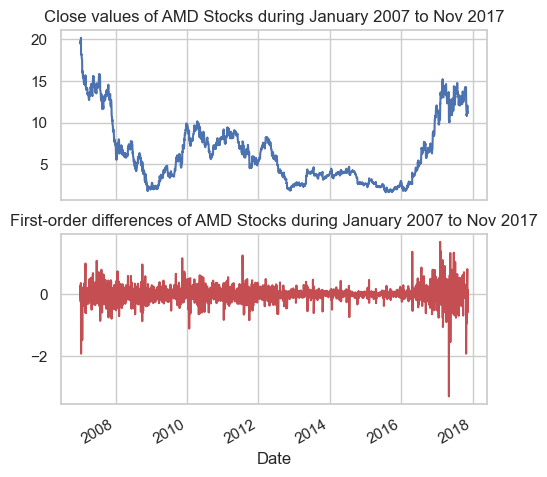

In [74]:
# Declare the fig abd ax as two arguments 
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(5.5, 5.5)
df_AMD_stocks['Close'].plot(ax = ax[0], color = 'b')
ax[0].set_title('Close values of AMD Stocks during January 2007 to Nov 2017')
first_order_diff.plot(ax = ax[1], color = 'r')
ax[1].set_title('First-order differences of AMD Stocks during January 2007 to Nov 2017')

ADF Statistic: -16.431272
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


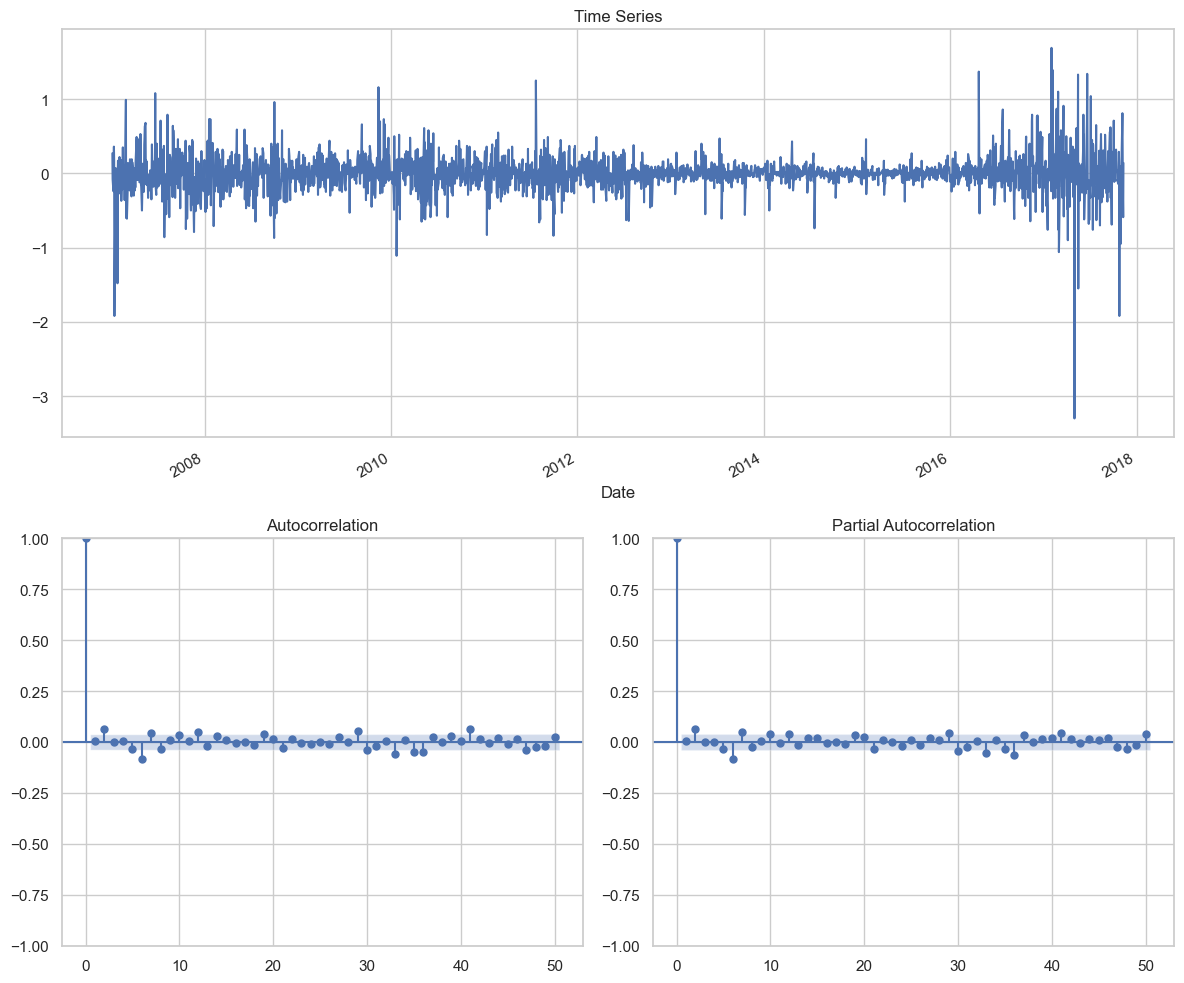

In [75]:
# calculate stationarity test of time series data through differentiation

# plot the data with 50 lags
plotds(first_order_diff, nlag = 50)

# Perform Dicky Fuller test
adf_result = adfuller(first_order_diff)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -16.431272 es mucho menor que los valores críticos, rechazamos la hipótesis nula, lo que sugiere que la serie temporal es estacionaria.

p-value: 0.000000 fortalece la evidencia contra la hipótesis nula, indicando que la serie es estacionaria.

Critical Values: Los valores críticos para los niveles de confianza del 1%, 5% y 10% son -3.433, -2.863 y -2.567, respectivamente. Dado que el estadístico ADF es menor que estos tres valores, podemos decir con un nivel de confianza del 1% que la serie temporal es estacionaria.

Los resultados sugieren fuertemente que, después de la diferenciación, la serie temporal es definitivamente estacionaria.

Ademas con Augmented Dickey-Fuller test through differentiation eliminamos el ruido blanco que teniamos anteriormente en la Autocorrelation ya que ahora todos los valores estan cerca de 0.

### Hyperparameters for ARIMA model

Este enfoque nos ayuda a identificar qué conjunto de hiperparámetros podría ser el mejor para nuestro modelo ARIMA basado en el criterio de AIC.
Los modelos con un AIC más bajo son preferibles porque indican un mejor equilibrio entre la bondad de ajuste y la simplicidad (o complejidad) del modelo, lo que ayuda a prevenir el sobreajuste y seleccionar un modelo que generalice bien a nuevos datos.

En este caso nuestro AIC seria (2, 1, 0) con un AIC de 6.526

* p = 2 , Number of autoregressive (AR) terms in the model
* d = 1 , Number of times that the raw observations are differenced, also called the degree of differencing.
* q = 0 , Number of moving average (MA) terms in the model

In [76]:
# A nested loop is written to calculate the AIC values
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(df_AMD_stocks['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aicVal)

[[0, 1, 0, 13.89076814274155], [0, 1, 1, 15.868960414955325], [0, 1, 2, 6.732651364535442], [1, 1, 0, 15.866153944716928], [1, 1, 1, 15.859207202263093], [1, 1, 2, 8.621309688696869], [2, 1, 0, 6.525753942304391], [2, 1, 1, 8.525569045329291], [2, 1, 2, 10.521742778897249], [0, 2, 0, 1900.9486863213997], [0, 2, 1, 21.210870375981017], [0, 2, 2, 23.201994971226895], [1, 2, 0, 998.4619915745252], [1, 2, 1, 23.201986339767075], [1, 2, 2, 23.252495991138517], [2, 2, 0, 734.1437735970092], [2, 2, 1, 14.692148253940218], [2, 2, 2, 26.903196010866367]]


In [77]:
# Declare and initialise an object 'arima_obj' by calling a method 'ARIMA()'
arima_obj = ARIMA(df_AMD_stocks['Close'].tolist(), order = (2, 1, 0))

# Train the ARIMA model by calling a method fit()
arima_obj_fit = arima_obj.fit()

# Display the summary of the trained model
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2736
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  -0.263
Date:                Wed, 01 Nov 2023   AIC                              6.526
Time:                        17:54:04   BIC                             24.267
Sample:                             0   HQIC                            12.937
                               - 2736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0029      0.013      0.216      0.829      -0.023       0.029
ar.L2          0.0644      0.016      4.033      0.000       0.033       0.096
sigma2         0.0586      0.001    116.983      0.000       0.058       0.060
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             46830.73
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.98
Prob(H) (two-sided):                  0.34   Kurtosis:                        23.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

* AIC: Akaikes Information Criterion: Estimator of the relative quality of statistical models for a given set of data. The AIC deals with the trade-off betwen the goodness of fit of the model and the simplicity of the model.
* BIC: Bayesian Information Criterion: Similar to the AIC, but with a larger penalty term for the number of parameters in the model.
* Hannan–Quinn information criterion (HQC) is a criterion for model selection. It is an alternative to Akaike information criterion (AIC) and Bayesian information criterion (BIC). It is given as. where. is the log-likelihood, k is the number of parameters, and n is the number of observations.

In [78]:
# Declare the array 'pred' and append the values 
pred = arima_obj_fit.fittedvalues

# Add a new column 'ARIMA' into dataframe
df_AMD_stocks['ARIMA'] = pred

# Residues and fitted values are added and stored into dataframe
diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

# Add a column 'diffval' into dataframe
df_AMD_stocks['diffval'] = diffval

# Display first five records
df_AMD_stocks.head()

Open   High    Low  Close    Volume      ARIMA  diffval
Date                                                                
2007-01-03  20.08  20.40  19.35  19.52  28107900   0.000000    19.52
2007-01-04  19.66  19.86  19.32  19.79  23380300  19.520000    19.79
2007-01-05  19.54  19.91  19.54  19.71  15772600  19.790838    19.71
2007-01-08  19.71  19.86  19.25  19.47  15814600  19.727158    19.47
2007-01-09  19.45  19.71  19.37  19.65  14098100  19.464151    19.65

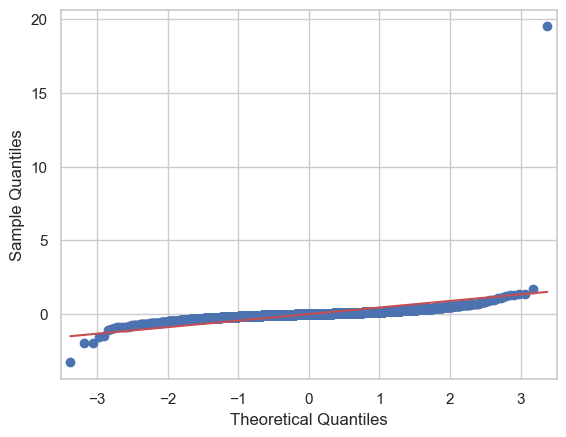

In [79]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
# Call qqplot() for arima_obj_fit
x = sm.qqplot(arima_obj_fit.resid, line = 's')

In [80]:
print(df_AMD_stocks['diffval'], df_AMD_stocks['ARIMA'])

Date
2007-01-03    19.52
2007-01-04    19.79
2007-01-05    19.71
2007-01-08    19.47
2007-01-09    19.65
              ...  
2017-11-06    11.93
2017-11-07    12.05
2017-11-08    11.71
2017-11-09    11.12
2017-11-10    11.26
Name: diffval, Length: 2736, dtype: float64 Date
2007-01-03     0.000000
2007-01-04    19.520000
2007-01-05    19.790838
2007-01-08    19.727158
2007-01-09    19.464151
                ...    
2017-11-06    11.124004
2017-11-07    11.949741
2017-11-08    12.102518
2017-11-09    11.716742
2017-11-10    11.096389
Name: ARIMA, Length: 2736, dtype: float64


Text(0, 0.5, 'Closing')

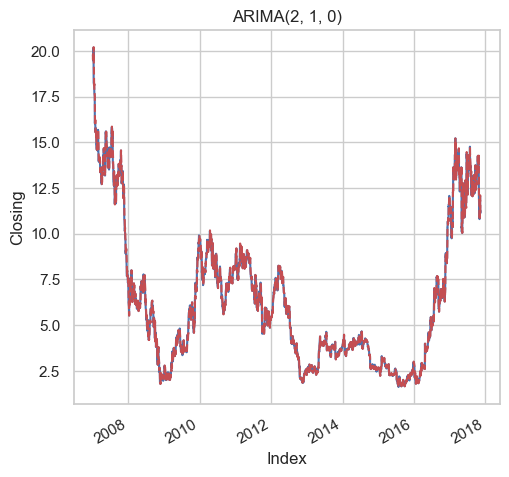

In [81]:
# Declare the objects f and array axarr
f, axarr = plt.subplots(1, sharex = True)
f.set_size_inches(5.5, 5.5)

# Ignore first one rows because of difference factor d = 1
df_AMD_stocks['diffval'].iloc[1:].plot(color = 'b', linestyle = '-', ax = axarr)
df_AMD_stocks['ARIMA'].iloc[1:].plot(color = 'r', linestyle = '--', ax = axarr)
axarr.set_title('ARIMA(2, 1, 0)')
plt.xlabel('Index')
plt.ylabel('Closing')

In [82]:
result = arima_obj_fit.get_forecast()
forecast = result.predicted_mean

# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]

for a in intervals:
    ci = result.conf_int(alpha=a)
    print('%.1f%% Confidence Interval: %.3f between %.3f and %.3f' % ((1-a)*100, forecast, ci[0,0], ci[0,1]))

80.0% Confidence Interval: 11.222 between 10.912 and 11.533
90.0% Confidence Interval: 11.222 between 10.824 and 11.620
95.0% Confidence Interval: 11.222 between 10.748 and 11.697
99.0% Confidence Interval: 11.222 between 10.599 and 11.846


# Comparison Linear Regression vs ARIMA